In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import librosa
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans

In [10]:
data = []
meta_data = []
feature_vectors = []
scaler = MinMaxScaler()
folder_path = '/kaggle/input/ds203-v2-dataset/MFCC-files-v2-20241024'
file_names = os.listdir(folder_path)
for file in file_names:
    file_path = os.path.join(folder_path,file)
    meta_data.append(file)
    df = pd.read_csv(file_path,header=None)
    df = df.T
    mfcc_data_scaled = scaler.fit_transform(df)
    mfcc_data_scaled = pd.DataFrame(mfcc_data_scaled)
    delta_mfcc = librosa.feature.delta(mfcc_data_scaled)
    delta2_mfcc = librosa.feature.delta(mfcc_data_scaled, order=2)
    combined_mfcc = np.hstack([mfcc_data_scaled, delta_mfcc, delta2_mfcc])
    combined_mfcc_df = pd.DataFrame(combined_mfcc)
    mean_mfcc = np.mean(combined_mfcc, axis=0)
    var_mfcc = np.var(combined_mfcc, axis=0)
    min_mfcc = np.min(combined_mfcc, axis=0)
    max_mfcc = np.max(combined_mfcc, axis=0)
    skew_mfcc = skew(combined_mfcc, axis=0)
    kurtosis_mfcc = kurtosis(combined_mfcc, axis=0)
    feature_vector = np.concatenate((mean_mfcc, var_mfcc, min_mfcc, max_mfcc, skew_mfcc, kurtosis_mfcc))
    feature_vectors.append(feature_vector)
    data.append(combined_mfcc_df)

In [3]:
print(meta_data[0])
data[0].head()

70-MFCC.csv


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.765423,0.279168,0.529809,0.344552,0.567166,0.435292,0.60961,0.499908,...,-0.001157,-0.002637,0.002971,0.002643,-0.002506,-0.000709,-0.000709,-0.000709,-0.000709,-0.000709
1,0.0,0.0,0.765423,0.279168,0.529809,0.344552,0.567166,0.435292,0.60961,0.499908,...,-0.001157,-0.002637,0.002971,0.002643,-0.002506,-0.000709,-0.000709,-0.000709,-0.000709,-0.000709
2,0.0,0.0,0.765423,0.279168,0.529809,0.344552,0.567166,0.435292,0.60961,0.499908,...,-0.001157,-0.002637,0.002971,0.002643,-0.002506,-0.000709,-0.000709,-0.000709,-0.000709,-0.000709
3,0.0,0.0,0.765423,0.279168,0.529809,0.344552,0.567166,0.435292,0.60961,0.499908,...,-0.001157,-0.002637,0.002971,0.002643,-0.002506,-0.000709,-0.000709,-0.000709,-0.000709,-0.000709
4,0.0,0.0,0.765423,0.279168,0.529809,0.344552,0.567166,0.435292,0.60961,0.499908,...,-0.001157,-0.002637,0.002971,0.002643,-0.002506,-0.000709,-0.000709,-0.000709,-0.000709,-0.000709


<Axes: >

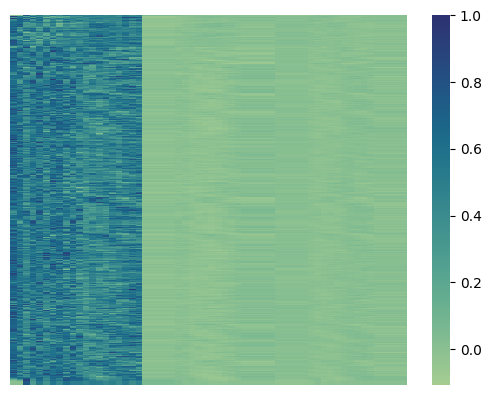

In [9]:
sns.heatmap(data[0],cmap='crest', xticklabels=False, yticklabels=False)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  
feature_vector_pca = pca.fit_transform(feature_vectors)

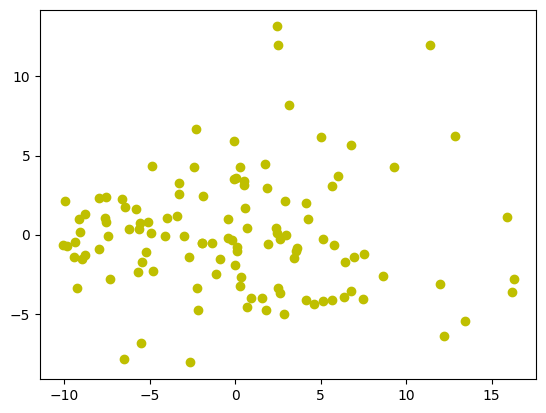

In [12]:
plt.scatter(feature_vector_pca[:,0] ,feature_vector_pca[:,1],color = 'y' )
plt.show()

In [17]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(feature_vectors)
labels = kmeans.labels_

In [18]:
labels = np.array()

(116,)

In [33]:
cluster = np.array([meta_data,labels])
clustered_df = pd.DataFrame(cluster)
clustered_df = clustered_df.T

In [34]:
clustered_df.head()

,0,1
0,70-MFCC.csv,0
1,104-MFCC.csv,3
2,67-MFCC.csv,1
3,110-MFCC.csv,4
4,92-MFCC.csv,1


In [35]:
clustered_df.to_csv('clustered_files.csv')